# Stock Market Analysis and Predictive Model 

**By Alex Mason**

Hello and welcome to this Jupyter Notebook. This project will focus on creating a predictive model on stock market data from 85 of the top NASDAQ 100 stocks as of July 26th, 2021. The NASDAQ 100 is constantly updated based on market cap of companies, balance sheets, and the health of companies to be part of this group of stocks. So this list is subject to change, hence why I have provided the date when all of the data was collected.

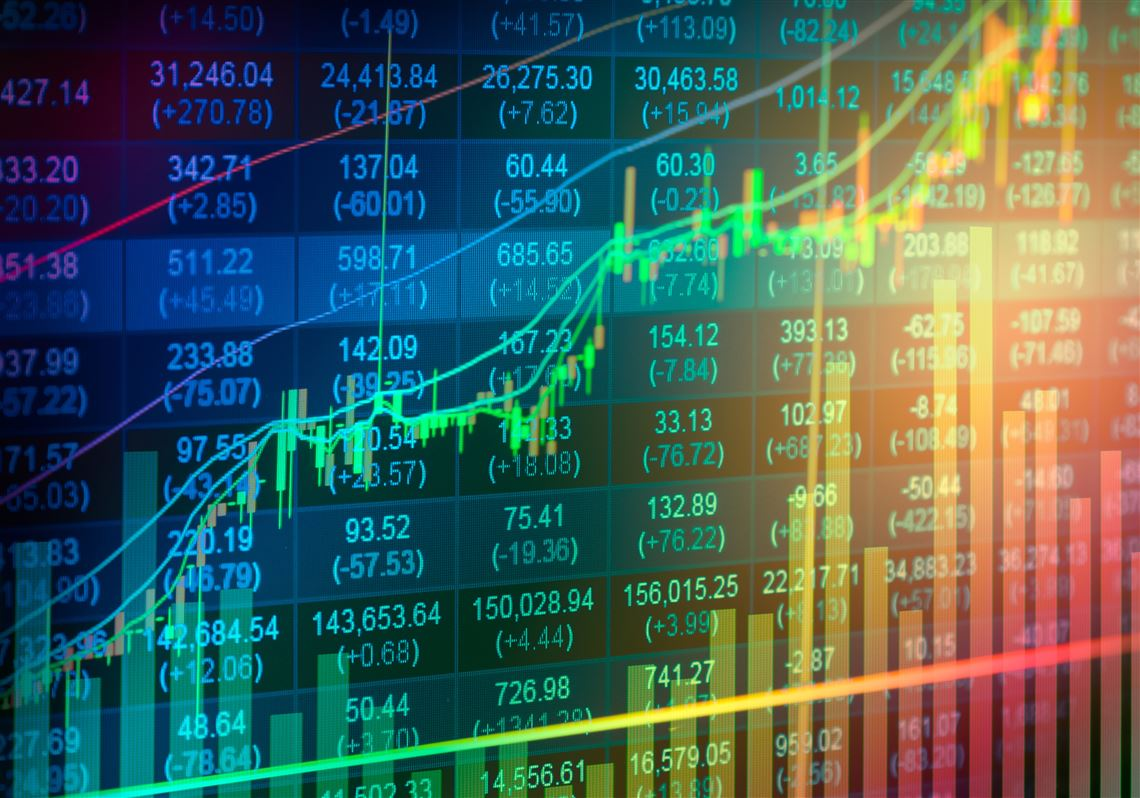

The structure of this project will be as follows:

1. Python Imported Packages
2. Data Overview and Loading the Dataset
3. Exploratory Data Analysis
4. Data Cleansing/PreProcessing
5. Model Preparation & Train-Test Split 
6. Model Performance Metrics

Let's start by importing packages in the programming language python to help us with this project.

## Python Imported Packages

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

%matplotlib inline 

Great, these packages will help us to alter and clean up some of the data we will load into this notebook and packages like matplotlib and seaborn will help us with some data visualizations to analyze the data in greater detail. Let's now move onto the next section where we will now take a look at our dataset.

## Data Overview and Loading the Dataset

The dataset we will be analzing today is a list of 85 stocks and their trading information from April 1st, 2015 - April 1st, 2020. So we will be looking at exactly 5 years of data for our stocks. In a given year, there are on average, 253 trading days in a year. So as a quick calculation, we can expect to be looking at around 107,525 values in our dataset (253x85x5). This should be close to our total data, but there may be some variability resulting in a bit less.


This is a kaggle dataset which can be assessed here: https://www.kaggle.com/jacksoncrow/stock-market-dataset

I grabbed 85 of the stocks in this dataset that were part of the NASDAQ 100, and then did some edits in PowerQuery in MS Excel to create this dataset we will be analyzing. I will now load in the dataset from my local repo:

In [2]:
stocks = pd.read_csv('C:/Users/User/Desktop/Data Science Folder- Alex Mason/Data_Science_Projects_2021/Stock_Data.csv')

Let us now look at some of the general information about the data and what each column represents:

In [3]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107100 entries, 0 to 107099
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Source.Name  107100 non-null  object 
 1   Company      107100 non-null  object 
 2   Symbol       107100 non-null  object 
 3   Date         107100 non-null  object 
 4   Open         107100 non-null  float64
 5   High         107100 non-null  float64
 6   Low          107100 non-null  float64
 7   Close        107100 non-null  float64
 8   Adj Close    107100 non-null  float64
 9   Volume       107100 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 8.2+ MB


We notice that our data is primarily made up of 64-bit floating-point numbers and object data types. When we move onto our data preprocessing section, we will look a bit further into this and possible change our data types depending on analyzing our data and looking forward towards building a predictive model. Let's now look at some quick statistics to see if we can make any immediate inferences on our dataset.

I will also break down what these columns represent further below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Column</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Source.Name</td>
      <td>This is the name of the original .csv file corresponding to the company in this dataset. Each stock was its own seperate dataset, so I merged them all into one file and kept the source name for reference.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Company</td>
      <td>This is the name of the company that we will be analyzing. There are a total of 85 unique companies in this dataset. </td>
    </tr>
    <tr>
      <th>2</th>
      <td>Symbol</td>
      <td>This is the ticker symbol for how the stock is identified when is is trading on the stock market. A ticker symbol is assigned to a company for trading purposes. NASDAQ-listed securities can have up to five characters.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Date</td>
      <td>This is the date that the stock was trading on. No weekend dates are included because securities cannot be traded on weekends. Typically, the stock market is open between 9:30 AM - 4:00 PM Mon-Fri excluding holidays. </td>
    </tr>
    <tr>
      <th>4</th>
      <td>Open</td>
      <td>This is the price of the company at the start of the trading day. Typically, this is the price of the stock at 9:30 AM when the market opens.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>High</td>
      <td>This is the highest price that the stock reached during the date that it was trading on.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Low</td>
      <td>This is the lowest price that the stock reached during the date that it was trading on.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Close</td>
      <td>This is the price of the stock at the end of the trading day. This is typically at 4:30PM.</td> 
    </tr>
    <tr>
      <th>8</th>
      <td>Adj Close</td>
      <td>This is the adjusted close price. The adjusted closing price is looked at and considered when examining typical historic returns. More information can be found here on how to calculate an adjusted closing price: <a href="https://www.investopedia.com/terms/a/adjusted_closing_price.asp#:~:text=What%20Is%20the%20Adjusted%20Closing,detailed%20analysis%20of%20past%20performance.">Adjusted Closing Price</a></td>
    </tr>
    <tr>
        </tr>
    <tr>
      <th>9</th>
      <td>Volume</td>
      <td>This is how many shares traded hands over the course of the specificed trading day. This is how many times people bought and sold shares of this company in a given day.</td> 
    </tr>
  </tbody>
</table>


In [4]:
stocks.describe()

Open           High            Low          Close  \
count  107100.000000  107100.000000  107100.000000  107100.000000   
mean      137.083816     138.659522     135.463005     137.118344   
std       185.362793     187.301084     183.272214     185.362414   
min         1.620000       1.690000       1.610000       1.620000   
25%        53.090000      53.650002      52.520000      53.119999   
50%        84.150002      85.019997      83.209999      84.185001   
75%       156.910004     158.672497     154.919998     156.882504   
max      2173.070068    2185.949951    2161.120117    2170.219971   

           Adj Close        Volume  
count  107100.000000  1.071000e+05  
mean      134.393981  6.455022e+06  
std       185.936573  1.155672e+07  
min         1.620000  0.000000e+00  
25%        49.759998  1.267600e+06  
50%        81.018269  2.504500e+06  
75%       153.117935  6.180575e+06  
max      2170.219971  3.250584e+08

So from here we can note that we have 107,100 values in our dataset (close to what we estimated!). Some other interesting notes is that of all of our stocks, The mean price on a given opening day is ~=$137. We can also see the lowest priced company and the company with the highest price per share. We can look into these companies during our analysis section. For now, I will display a list of all 85 companies that we will be looking at: 

In [5]:
stocks['Company'].unique()

array(['Apple Inc', 'Adobe Inc', 'Analog Devices Inc',
       'Automatic Data Processing Inc', 'Autodesk Inc',
       'American Electric Power Co Inc', 'Align Technology Inc',
       'Applied Materials Inc', 'Advanced Micro Devices Inc', 'Amgen Inc',
       'Amazon Inc', 'ANSYS Inc', 'ASML Holding NV',
       'Activision Blizzard Inc', 'Broadcom Inc', 'Baidu Inc ADR',
       'Biogen Inc', 'Cadence Design Systems Inc', 'CDW Corp/DE',
       'Cerner Corp', 'Check Point Software Technologies Ltd',
       'Charter Communications Inc', 'Comcast Corp',
       'Costco Wholesale Corp', 'Copart Inc',
       'Cisco Systems Inc/Delaware', 'CSX Corp', 'Cintas Corp',
       'Cognizant Technology Solutions Corp', 'Dexcom Inc',
       'Electronic Arts Inc', 'eBay Inc', 'Exelon Corp', 'Fastenal Co',
       'Facebook Inc', 'Fiserv Inc', 'Gilead Sciences Inc',
       'Alphabet Inc', 'Honeywell International Inc',
       'IDEXX Laboratories Inc', 'Illumina Inc', 'Intel Corp',
       'Intuit Inc', 'Intuit

In [6]:
#Look at a random company individually
stocks.sample()

Source.Name    Company Symbol      Date        Open        High  \
1091    AAPL.csv  Apple Inc   AAPL  8/1/2019  213.899994  218.029999   

             Low       Close   Adj Close    Volume  
1091  206.740005  208.429993  206.529373  54017900

## Exploratory Data Analysis

Let's start by taking a historical view of the closing price of one of the companies in our dataset, such as Amazon:

In [7]:
Amazon = stocks[stocks['Company'] == 'Amazon Inc']
print(Amazon.shape)

(1260, 10)


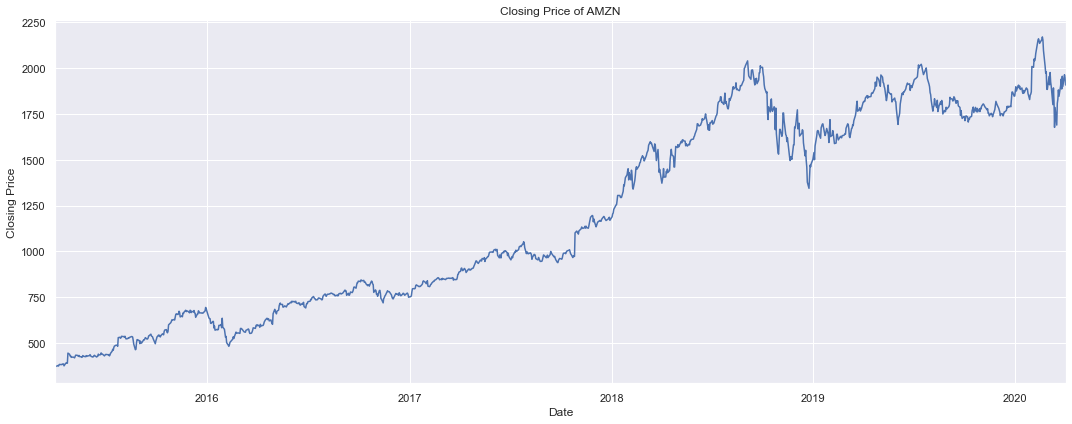

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
x = pd.to_datetime(Amazon['Date'])
y = Amazon['Close']
plt.plot(x, y)
plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.title("Closing Price of AMZN")

plt.tight_layout()

Now lets compare a couple companies and how they performed over the 5 year span using their closing date. We'll grab the 6 biggest companies by market cap in Nasdaq 100 found here: https://www.nasdaq.com/market-activity/quotes/nasdaq-ndx-index

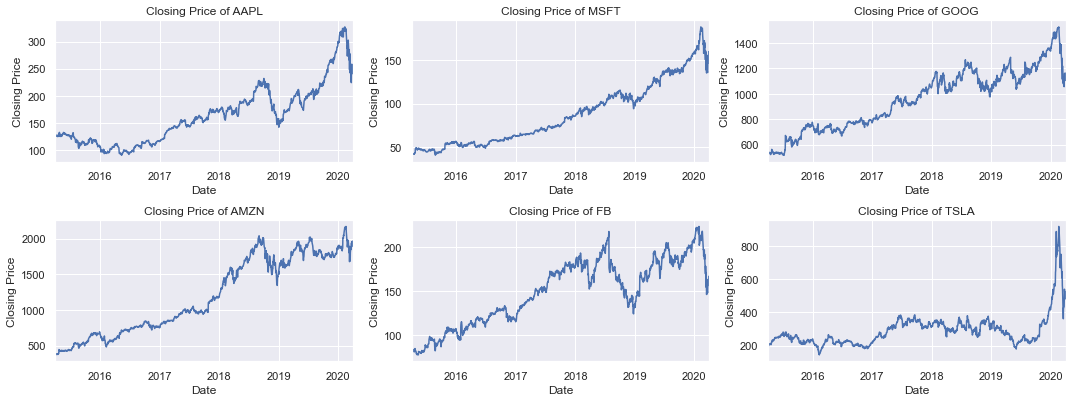

In [9]:
Apple = stocks[stocks['Company'] == 'Apple Inc']
Microsoft = stocks[stocks['Company'] == 'Microsoft Corp']
Google = stocks[stocks['Company'] == 'Alphabet Inc']
Facebook = stocks[stocks['Company'] == 'Facebook Inc']
Tesla = stocks[stocks['Company'] == 'Tesla Inc']

Top_6_MK = [Apple, Microsoft, Google, Amazon, Facebook, Tesla]
Company_Name = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB', 'TSLA']

fig, ax = plt.subplots(figsize=(15, 8))
for i, company in enumerate(Top_6_MK, 1):
    plt.subplot(3, 3, i)
    x = pd.to_datetime(company['Date'])
    y = company['Close']
    plt.plot(x, y)
    plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {Company_Name[i-1]}")
    

    plt.tight_layout()

All things considered, these companies were moving in the upwards direction. Because the date was placed until April 1st, 2020 we can see that there is a huge decline in value in stocks towards the end of these graphs because the market began to crash in early march 2020, which we can note by extracting the last 6 months back to see the decline relative to scale:

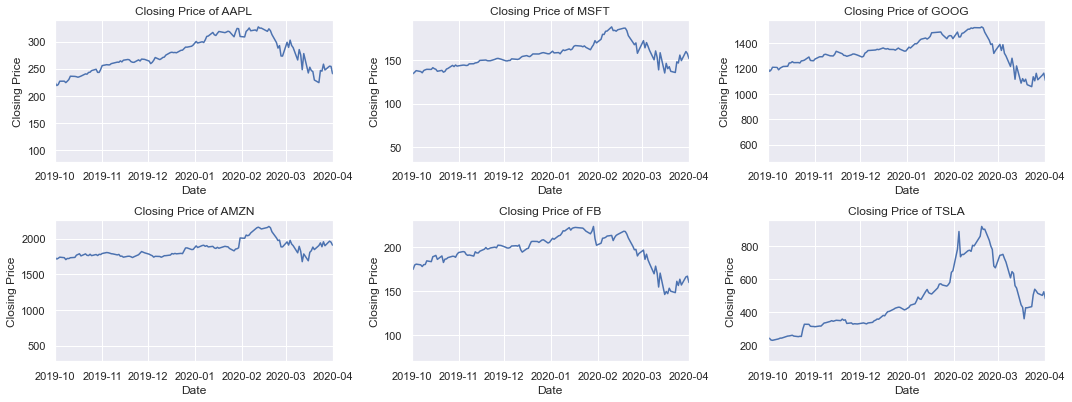

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
for i, company in enumerate(Top_6_MK, 1):
    plt.subplot(3, 3, i)
    x = pd.to_datetime(company['Date'])
    y = company['Close']
    plt.plot(x, y)
    plt.xlim([datetime.date(2019, 10, 1), datetime.date(2020, 4, 1)])

    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {Company_Name[i-1]}")
    

    plt.tight_layout()

We can see from this that Telsa had quite a run up in stock price in late 2019, but diverged back in march 2020 to around its price in late december 2019.

If we wanted to, we could pack each of the companies into a seperate dataframe using a dictionary like so:

In [11]:
a = stocks['Company'].unique()

companydict = {name: pd.DataFrame() for name in a}

for key in companydict.keys():
    companydict[key] = stocks[:][stocks.Company == key]
    
# use last key
print(companydict[key])

       Source.Name     Company Symbol       Date       Open       High  \
105840    XLNX.csv  Xilinx Inc   XLNX   4/1/2015  42.419998  42.500000   
105841    XLNX.csv  Xilinx Inc   XLNX   4/2/2015  41.980000  42.389999   
105842    XLNX.csv  Xilinx Inc   XLNX   4/6/2015  41.689999  42.389999   
105843    XLNX.csv  Xilinx Inc   XLNX   4/7/2015  42.020000  42.560001   
105844    XLNX.csv  Xilinx Inc   XLNX   4/8/2015  42.400002  42.830002   
...            ...         ...    ...        ...        ...        ...   
107095    XLNX.csv  Xilinx Inc   XLNX  3/26/2020  75.269997  80.410004   
107096    XLNX.csv  Xilinx Inc   XLNX  3/27/2020  77.349998  77.750000   
107097    XLNX.csv  Xilinx Inc   XLNX  3/30/2020  75.930000  79.430000   
107098    XLNX.csv  Xilinx Inc   XLNX  3/31/2020  78.620003  80.339996   
107099    XLNX.csv  Xilinx Inc   XLNX   4/1/2020  75.519997  79.120003   

              Low      Close  Adj Close   Volume  
105840  41.630001  41.849998  37.594349  3714000  
105841  4

If I attempt to display all 85 companies using subplots we will run into issues trying to display all of them. So in the next cell, we just need to copy and paste the name of the company that we wish to look at and the index to display the chart for that company:

['Apple Inc' 'Adobe Inc' 'Analog Devices Inc'
 'Automatic Data Processing Inc' 'Autodesk Inc'
 'American Electric Power Co Inc' 'Align Technology Inc'
 'Applied Materials Inc' 'Advanced Micro Devices Inc' 'Amgen Inc'
 'Amazon Inc' 'ANSYS Inc' 'ASML Holding NV' 'Activision Blizzard Inc'
 'Broadcom Inc' 'Baidu Inc ADR' 'Biogen Inc' 'Cadence Design Systems Inc'
 'CDW Corp/DE' 'Cerner Corp' 'Check Point Software Technologies Ltd'
 'Charter Communications Inc' 'Comcast Corp' 'Costco Wholesale Corp'
 'Copart Inc' 'Cisco Systems Inc/Delaware' 'CSX Corp' 'Cintas Corp'
 'Cognizant Technology Solutions Corp' 'Dexcom Inc' 'Electronic Arts Inc'
 'eBay Inc' 'Exelon Corp' 'Fastenal Co' 'Facebook Inc' 'Fiserv Inc'
 'Gilead Sciences Inc' 'Alphabet Inc' 'Honeywell International Inc'
 'IDEXX Laboratories Inc' 'Illumina Inc' 'Intel Corp' 'Intuit Inc'
 'Intuitive Surgical Inc' 'JD.com Inc ADR' 'Keurig Dr Pepper Inc'
 'KLA Corp' 'Lam Research Corp' 'Lululemon Athletica Inc'
 'Marriott International Inc/MD'

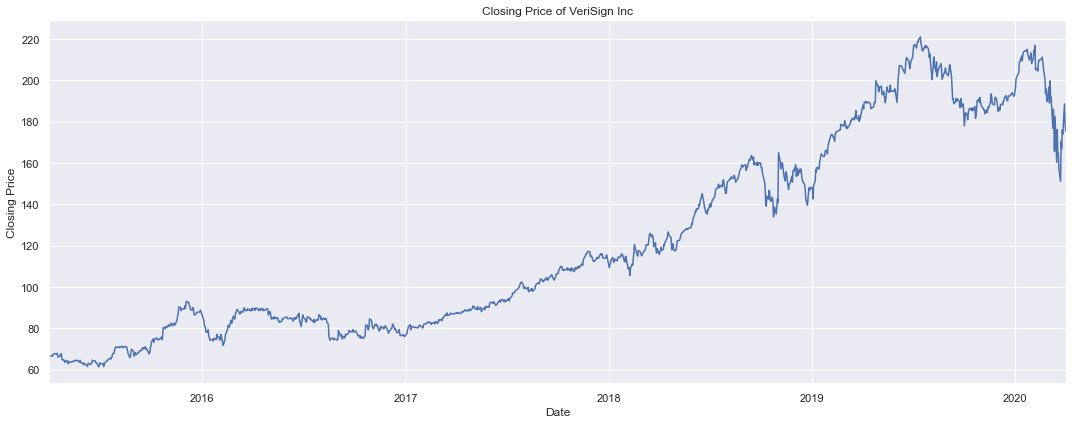

In [12]:
print(a)
fig, ax = plt.subplots(figsize=(15, 6))
comp = companydict['VeriSign Inc']
x = pd.to_datetime(comp['Date'])
y = comp['Close']
plt.plot(x, y)
plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.title(f"Closing Price of VeriSign Inc")

plt.tight_layout()

Alternatively, we could also compare several companies using subplots:

In [13]:
b = stocks[stocks["Company"].str.contains("g")]
d = b[b["Company"].str.contains("e")]
c = d['Company'].unique()

companydict1 = {name: pd.DataFrame() for name in c}

for key in companydict1.keys():
    companydict1[key] = stocks[:][stocks.Company == key]
    

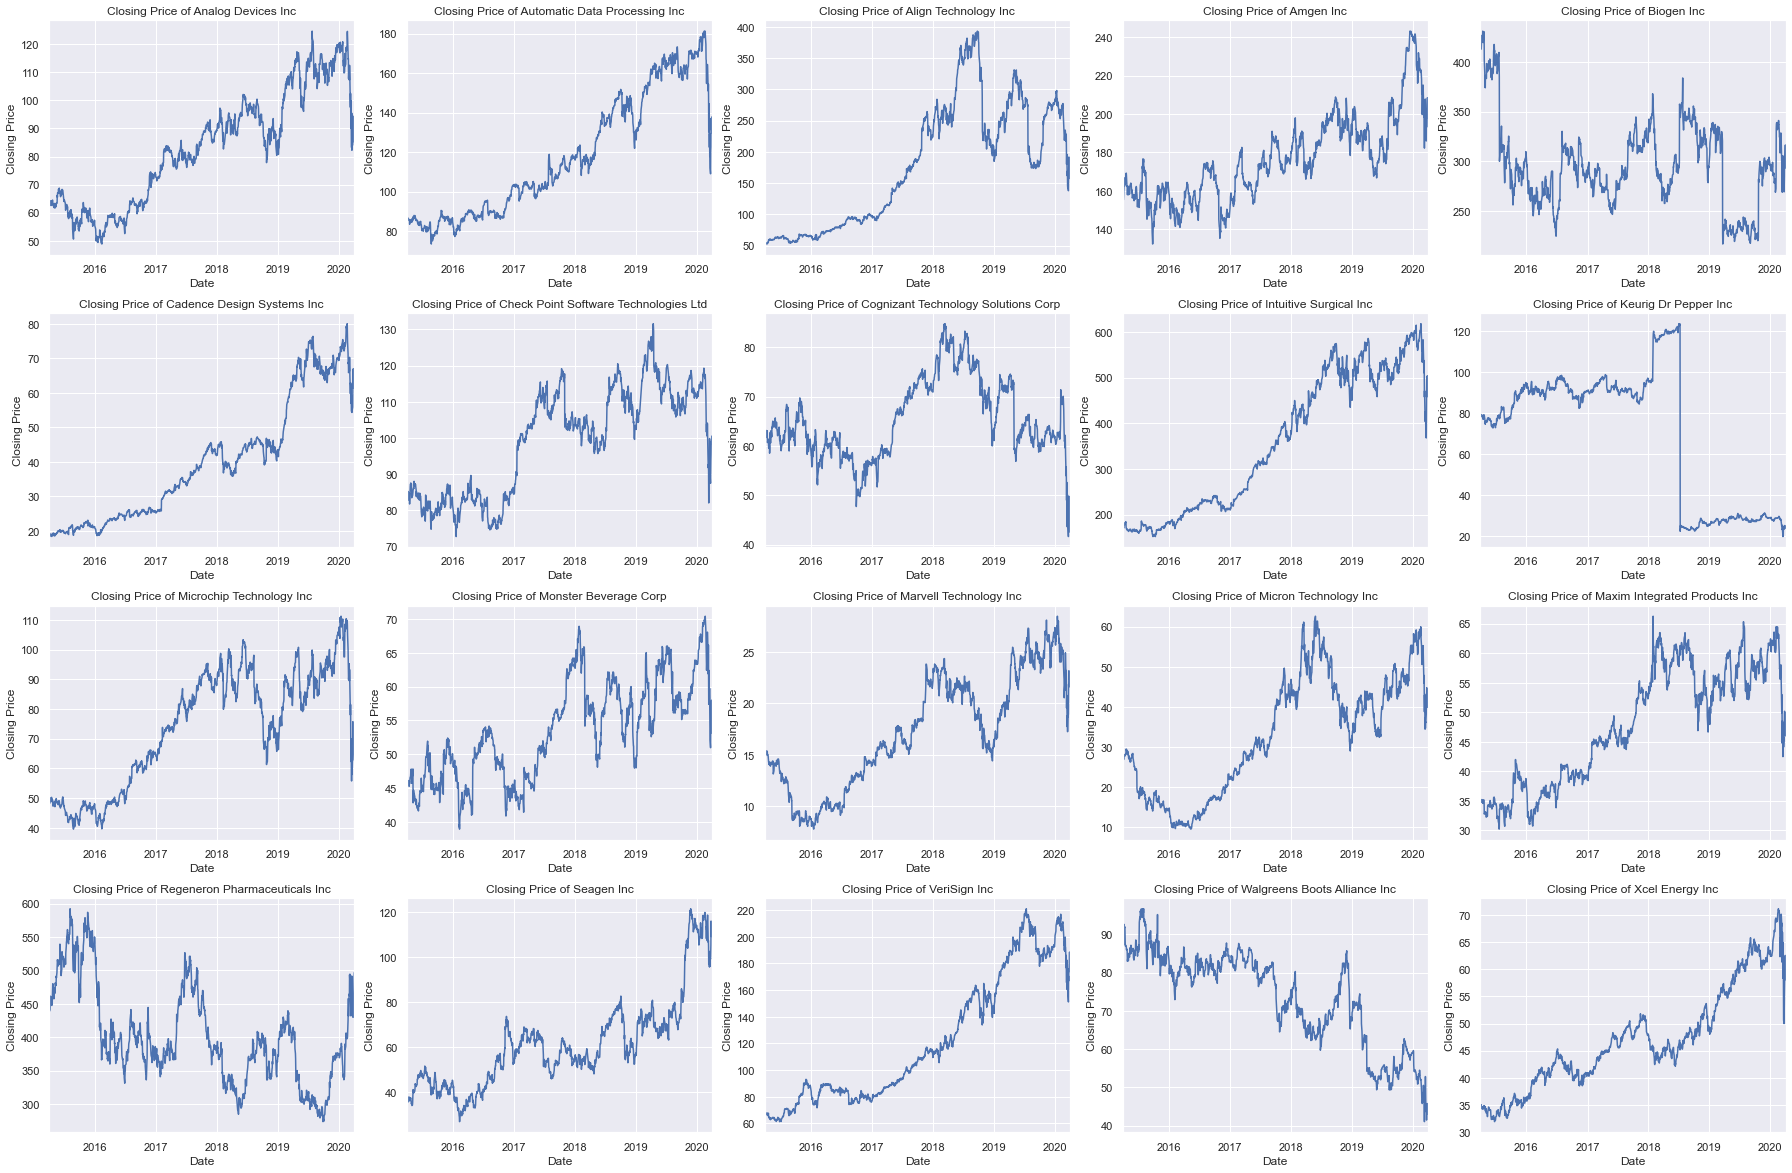

In [14]:
fig, ax = plt.subplots(figsize=(25,20))
for i, company in enumerate(companydict1, 1):
    plt.subplot(5, 5, i)
    x = pd.to_datetime(companydict1[company]['Date'])
    y = companydict1[company]['Close']
    plt.plot(x, y)
    plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {c[i-1]}")
    

    plt.tight_layout()

We note that most of these dip towards the end of the graph when the crash in March of 2020 happened but 2 majors finding I see from this are:

1. 15 of the 20 companies are at higher prices than they were 5 years ago even after the market crashed in March
2. The price of Dr Pepper Inc tanked in mid 2018. 

Let's do a quick search and see if there was a root cause to why the price sunk.

In July 2018, Keurig Green Mountain and Dr Pepper Snapple merged and as a result paid out a large dividend (approx $103.75) to shareholders for Dr Pepper Snapple in a \\$125/share to \\$22/share after the merger and the dividend. Dr Pepper Snapple Group was the surviving company.

More details here: 
1) https://www.cnbc.com/2018/07/12/keurig-dr-pepper-merger-brings-defection-acquisition-and-new-drama.html
2) https://investors.keurigdrpepper.com/2018-06-26-Dr-Pepper-Snapple-Group-Sets-Record-Date-for-Special-Dividend-Contemplated-by-Keurig-Transaction-and-Provides-Estimated-Earnings-and-Profits

Let us now analyze the volume fluctuations of the six largest companies in our dataset against the closing price of the stock each day:

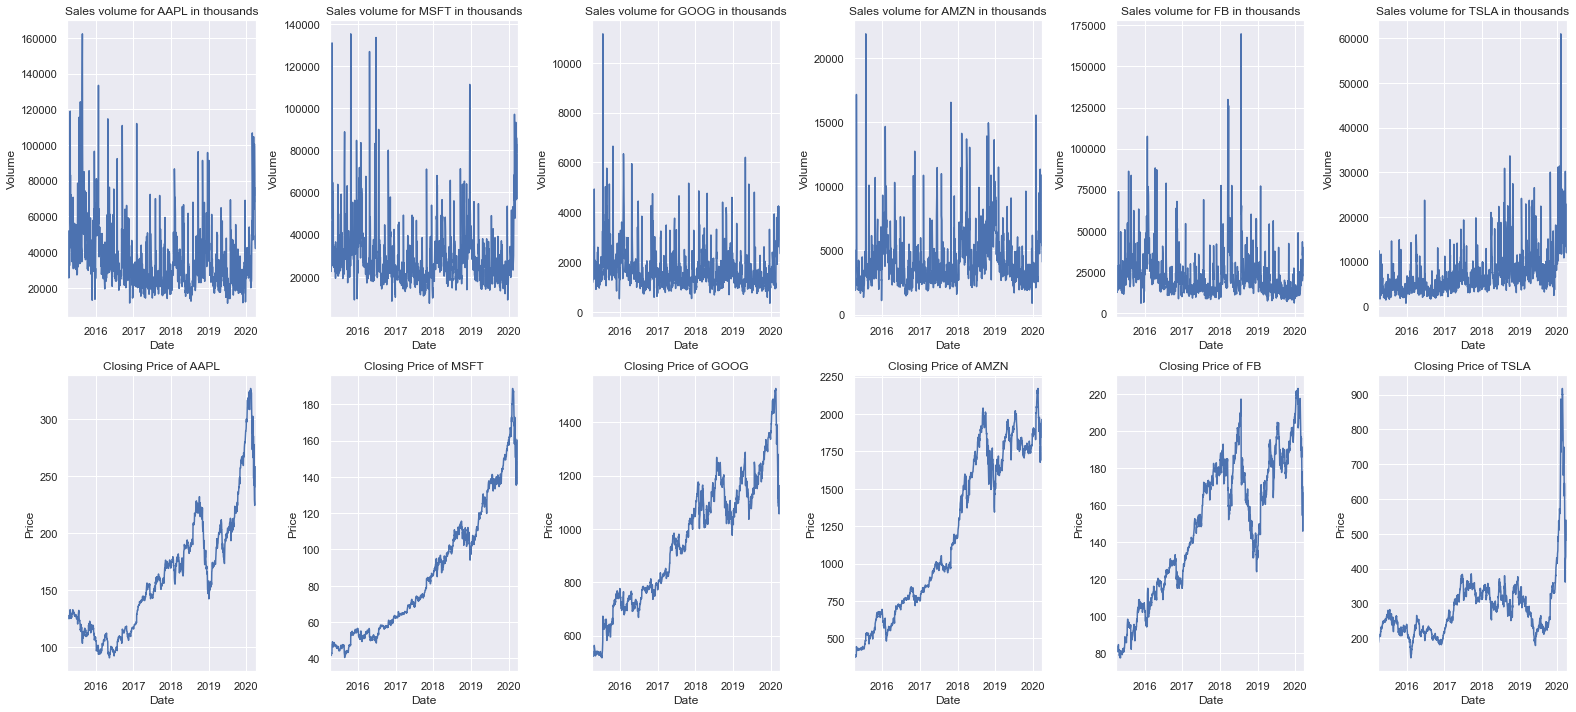

In [15]:
fig, ax1 = plt.subplots(2,6, figsize=(22, 10))
for i, company in enumerate(Top_6_MK, 1):
    x = pd.to_datetime(company['Date'])
    y = company['Volume']/1000
    ax1[0][i-1].plot(x,y)
    ax1[0][i-1].set_ylabel('Volume')
    ax1[0][i-1].set_xlabel('Date')
    ax1[0][i-1].set_title(f"Sales volume for {Company_Name[i-1]} in thousands")
    ax1[0][i-1].set_xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

for i, company in enumerate(Top_6_MK, 1):
    x1 = pd.to_datetime(company['Date'])
    y1 = company['Close']
    ax1[1][i-1].plot(x1, y1)
    ax1[1][i-1].set_ylabel('Price')
    ax1[1][i-1].set_xlabel('Date')
    ax1[1][i-1].set_title(f"Closing Price of {Company_Name[i-1]}")
    ax1[1][i-1].set_xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])
    plt.tight_layout()

We can see that daily volume changes over time depending on the stock, but it is not necessarily the best indicator of the price. Let us move on and now look at some of the moving averages at the dataset of 20 random stocks chosen out of our original 85. We will do a bit of data transformation below:

In [16]:
# moving averages for 10,25, 50, and 100 days
moving_avg = [10, 25, 50, 100]
e = d['Symbol'].unique()
for company in e:
    globals()[company] = d[d['Symbol'] == company]
    
f = [ADI, ADP, ALGN, AMGN, BIIB, CDNS, CHKP, CTSH, ISRG, KDP, MCHP,
 MNST, MRVL, MU, MXIM, REGN, SGEN, VRSN, WBA, XEL]    



for ma in moving_avg:
    for company in f:
        column_name = f"Moving average for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        company.set_index(pd.to_datetime(company['Date']))

Let us now look at one of the companies as a dataset and plot a few of those companies:

In [17]:
REGN

Source.Name                        Company Symbol       Date  \
84420    REGN.csv  Regeneron Pharmaceuticals Inc   REGN   4/1/2015   
84421    REGN.csv  Regeneron Pharmaceuticals Inc   REGN   4/2/2015   
84422    REGN.csv  Regeneron Pharmaceuticals Inc   REGN   4/6/2015   
84423    REGN.csv  Regeneron Pharmaceuticals Inc   REGN   4/7/2015   
84424    REGN.csv  Regeneron Pharmaceuticals Inc   REGN   4/8/2015   
...           ...                            ...    ...        ...   
85675    REGN.csv  Regeneron Pharmaceuticals Inc   REGN  3/26/2020   
85676    REGN.csv  Regeneron Pharmaceuticals Inc   REGN  3/27/2020   
85677    REGN.csv  Regeneron Pharmaceuticals Inc   REGN  3/30/2020   
85678    REGN.csv  Regeneron Pharmaceuticals Inc   REGN  3/31/2020   
85679    REGN.csv  Regeneron Pharmaceuticals Inc   REGN   4/1/2020   

             Open        High         Low       Close   Adj Close   Volume  \
84420  450.000000  450.000000  433.470001  441.179993  441.179993  1501000   
84421  443.179993  444.790008  434.429993  438.269989  438.269989   797800   
84422  434.250000  445.750000  434.010010  440.230011  440.230011   631800   
84423  440.190002  454.200012  440.190002  441.649994  441.649994   507300   
84424  444.369995  458.940002  440.049988  453.190002  453.190002   563000   
...           ...         ...         ...         ...         ...      ...   
85675  426.510010  452.700012  424.019989  452.299988  452.299988  1686200   
85676  446.029999  465.790008  445.149994  449.519989  449.519989  1109000   
85677  463.089996  476.100006  461.000000  473.000000  473.000000  1337000   
85678  474.000000  495.480011  463.799988  488.290008  488.290008  1953200   
85679  484.140015  499.989990  476.450012  496.649994  496.649994  1679800   

       Moving average for 10 days  Moving average for 25 days  \
84420                         NaN                         NaN   
84421                         NaN                         NaN   
84422                         NaN                         NaN   
84423                         NaN                         NaN   
84424                         NaN                         NaN   
...                           ...                         ...   
85675                  459.858997                  458.080000   
85676                  458.255997                  459.934800   
85677                  461.472998                  461.839600   
85678                  461.132999                  463.677200   
85679                  462.297998                  465.226399   

       Moving average for 50 days  Moving average for 100 days  
84420                         NaN                          NaN  
84421                         NaN                          NaN  
84422                         NaN                          NaN  
84423                         NaN                          NaN  
84424                         NaN                          NaN  
...                           ...                          ...  
85675                  415.241600                   388.594901  
85676                  416.417000                   389.985300  
85677                  418.165599                   391.604900  
85678                  420.212599                   393.161800  
85679                  422.871400                   394.883400  

[1260 rows x 14 columns]

Text(0.5, 1.0, 'REGN')

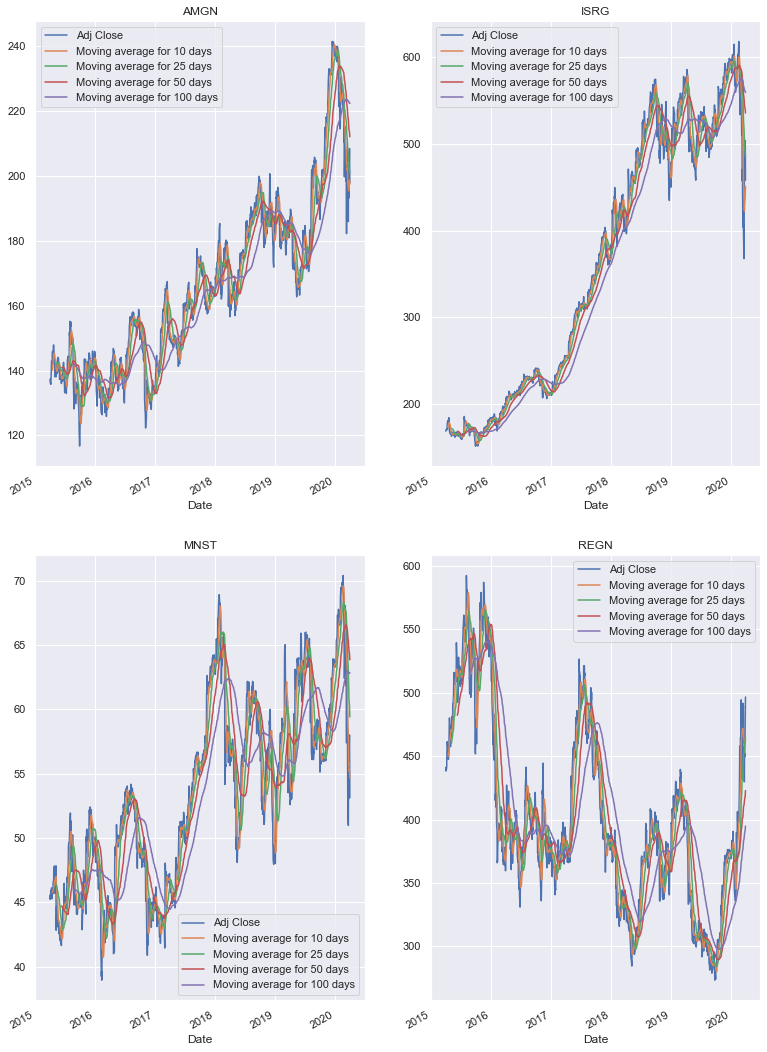

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(13)

AMGN = AMGN.set_index(pd.to_datetime(AMGN['Date']))
ISRG = ISRG.set_index(pd.to_datetime(ISRG['Date']))
MNST = MNST.set_index(pd.to_datetime(MNST['Date']))
REGN = REGN.set_index(pd.to_datetime(REGN['Date']))




AMGN[['Adj Close', 'Moving average for 10 days', 'Moving average for 25 days', 'Moving average for 50 days', 'Moving average for 100 days']].plot(ax=axes[0,0]) 
axes[0,0].set_title('AMGN')


ISRG[['Adj Close', 'Moving average for 10 days', 'Moving average for 25 days', 'Moving average for 50 days', 'Moving average for 100 days']].plot(ax=axes[0,1])
axes[0,1].set_title('ISRG')


MNST[['Adj Close', 'Moving average for 10 days', 'Moving average for 25 days', 'Moving average for 50 days', 'Moving average for 100 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MNST')


REGN[['Adj Close', 'Moving average for 10 days', 'Moving average for 25 days', 'Moving average for 50 days', 'Moving average for 100 days']].plot(ax=axes[1,1])
axes[1,1].set_title('REGN')



We could also look at all 20 stocks in our list in this way using one simple for loop, but it gets very clustered on screen and is harder to read:

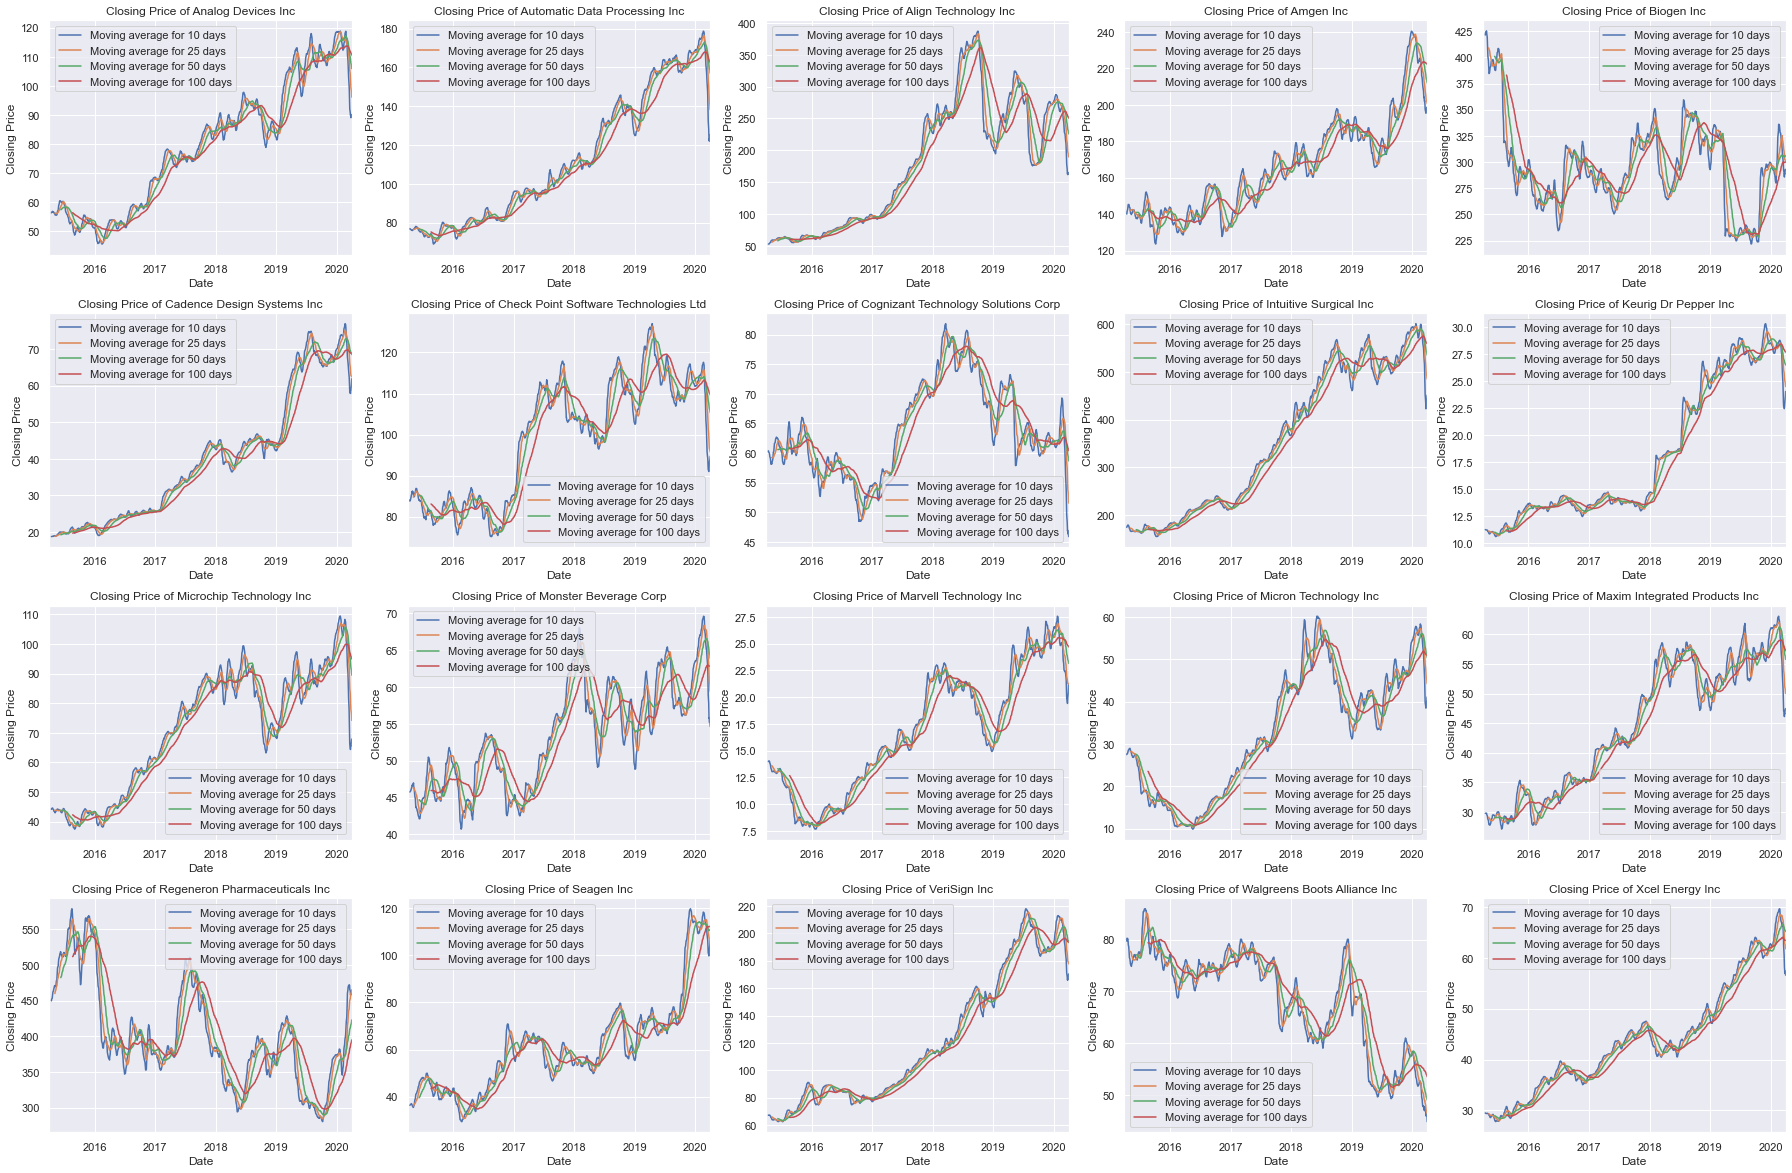

In [19]:
      
fig, ax = plt.subplots(figsize=(25,20))
for ma in moving_avg:
    for i, company in enumerate(companydict1, 1):
        plt.subplot(5, 5, i)
        x = pd.to_datetime(companydict1[company]['Date'])
        y = companydict1[company]['Adj Close'].rolling(ma).mean()
        plt.plot(x, y)
        plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

        plt.ylabel('Closing Price')
        plt.xlabel('Date')
        plt.title(f"Closing Price of {c[i-1]}")
        plt.legend(['Moving average for 10 days', 'Moving average for 25 days', 'Moving average for 50 days', 'Moving average for 100 days'])


        plt.tight_layout()

Let's now look at the daily returns using the adjusted closing price with the percent changes fucntion for the 6 largest companies by market cap in our dataset:

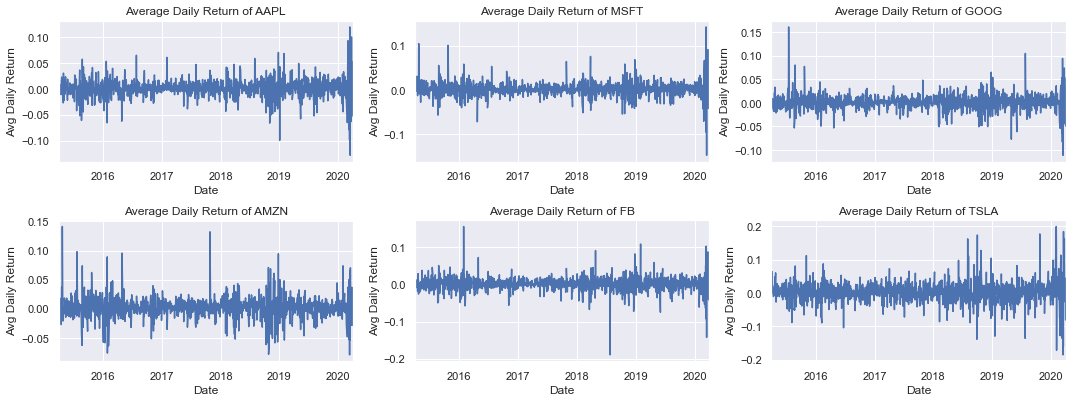

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
for i, company in enumerate(Top_6_MK, 1):
    plt.subplot(3, 3, i)
    x = pd.to_datetime(company['Date'])
    y = company['Adj Close'].pct_change()
    plt.plot(x, y)
    plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

    plt.ylabel('Avg Daily Return')
    plt.xlabel('Date')
    plt.title(f"Average Daily Return of {Company_Name[i-1]}")
    

    plt.tight_layout()

We could now stack and compare this to the closing price similar to what we did with trading volume and closing price to see if it makes sense based on periods of volatility with price and when the price of the stock explodes positively or negatively. To compare this properly, we will need the **Adjusted Closing Price** as opposed to the normal closing price:

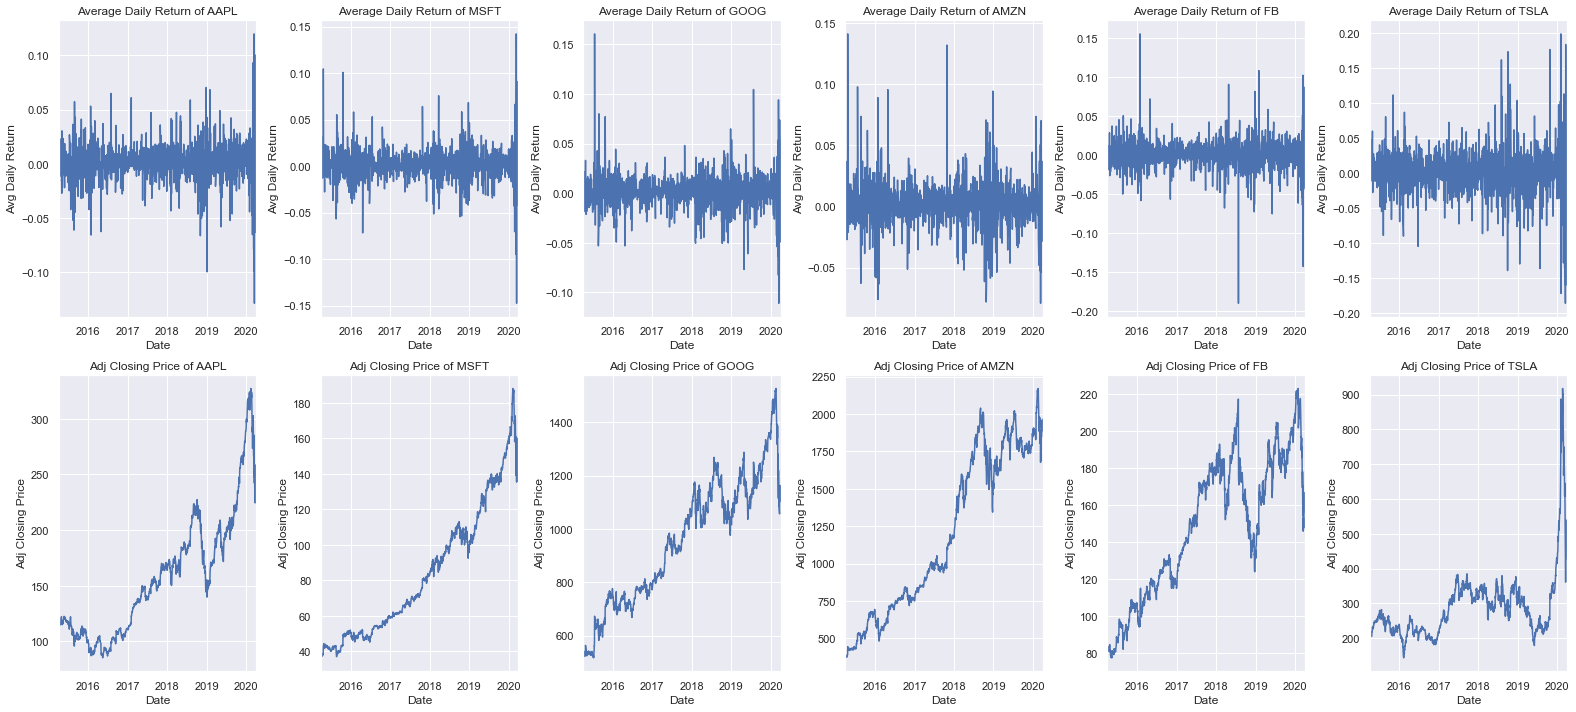

In [21]:
fig, ax1 = plt.subplots(2,6, figsize=(22, 10))
for i, company in enumerate(Top_6_MK, 1):
    x = pd.to_datetime(company['Date'])
    y = company['Adj Close'].pct_change()
    ax1[0][i-1].plot(x,y)
    ax1[0][i-1].set_ylabel('Avg Daily Return')
    ax1[0][i-1].set_xlabel('Date')
    ax1[0][i-1].set_title(f"Average Daily Return of {Company_Name[i-1]}")
    ax1[0][i-1].set_xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

for i, company in enumerate(Top_6_MK, 1):
    x1 = pd.to_datetime(company['Date'])
    y1 = company['Adj Close']
    ax1[1][i-1].plot(x1, y1)
    ax1[1][i-1].set_ylabel('Adj Closing Price')
    ax1[1][i-1].set_xlabel('Date')
    ax1[1][i-1].set_title(f"Adj Closing Price of {Company_Name[i-1]}")
    ax1[1][i-1].set_xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])
    plt.tight_layout()

You can see the areas of volatility from this comparison. What we can do next here is plot the average returns to see the types of distribution for the average returns using seaborn:

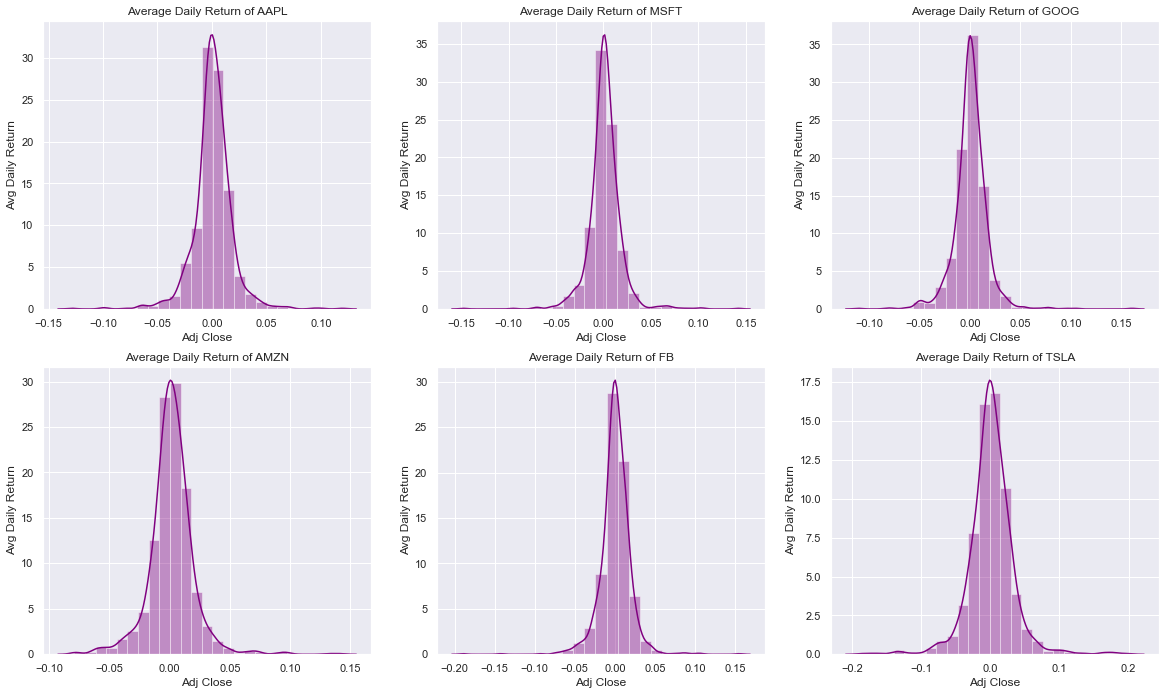

In [22]:
fig, ax = plt.subplots(figsize=(20, 18))
xa = np.linspace(0, 5, 20)
for i, company in enumerate(Top_6_MK, 1):
    plt.subplot(3, 3, i)
    sns.distplot(company['Adj Close'].pct_change().dropna(), bins=25, color='purple')

    plt.ylabel('Avg Daily Return')
    plt.title(f"Average Daily Return of {Company_Name[i-1]}")


Let's see now if we can see if there is any correlation between the closing prices of our stocks in our sublist of 20 largest stocks. For this next step, we will import the data to make it a bit easier for one dataframe:

In [23]:
import pandas_datareader.data as web

start = datetime.datetime(2015, 4, 1)
end = datetime.datetime(2020, 4, 1)
g = ['ADI', 'ADP', 'ALGN', 'AMGN', 'BIIB', 'CDNS', 'CHKP', 'CTSH', 'ISRG', 'KDP', 'MCHP',
 'MNST', 'MRVL', 'MU', 'MXIM', 'REGN', 'SGEN', 'VRSN', 'WBA', 'XEL']    

#corr_df = web.DataReader(f, 'yahoo', start, end)['Adj Close']
corr_df = web.get_data_yahoo(g,start=start,end=end)['Adj Close']
corr_df.head()

Symbols           ADI        ADP       ALGN        AMGN        BIIB  \
Date                                                                  
2015-04-01  54.203819  74.151901  52.450001  131.677185  413.809998   
2015-04-02  53.917942  74.725883  52.750000  130.654648  412.440002   
2015-04-06  54.385735  75.012894  53.070000  130.151718  413.420013   
2015-04-07  54.784233  74.673706  52.549999  131.828064  418.089996   
2015-04-08  55.156731  75.291214  52.720001  134.384506  425.359985   

Symbols          CDNS       CHKP       CTSH        ISRG        KDP       MCHP  \
Date                                                                            
2015-04-01  18.389999  81.870003  58.797958  168.839996  11.024442  42.642513   
2015-04-02  18.500000  82.489998  59.357662  169.429993  10.971075  42.527771   
2015-04-06  18.459999  82.839996  59.215359  171.443329  11.049720  42.651344   
2015-04-07  18.650000  83.989998  58.864357  170.820007  11.141006  43.189774   
2015-04-08  19.070000  85.220001  59.329205  170.486664  11.069384  43.180946   

Symbols          MNST       MRVL         MU       MXIM        REGN       SGEN  \
Date                                                                            
2015-04-01  45.549999  13.755582  27.129999  29.322395  441.179993  35.049999   
2015-04-02  45.220001  13.571807  26.730000  29.209146  438.269989  35.380001   
2015-04-06  45.906666  13.718827  27.430000  29.330784  440.230011  35.509998   
2015-04-07  45.840000  13.838281  26.870001  29.209146  441.649994  36.009998   
2015-04-08  45.930000  13.783149  27.129999  29.360144  453.190002  35.840000   

Symbols          VRSN        WBA        XEL  
Date                                         
2015-04-01  66.570000  70.652557  28.759237  
2015-04-02  66.690002  72.086395  28.668520  
2015-04-06  66.599998  73.796959  28.907698  
2015-04-07  66.519997  73.184830  28.462326  
2015-04-08  67.230003  73.520226  28.396357

In [24]:
# Change DF to now get daily returns
corr_dfnew = corr_df.pct_change()
corr_dfnew.head()

Symbols          ADI       ADP      ALGN      AMGN      BIIB      CDNS  \
Date                                                                     
2015-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2015-04-02 -0.005274  0.007741  0.005720 -0.007765 -0.003311  0.005982   
2015-04-06  0.008676  0.003841  0.006066 -0.003849  0.002376 -0.002162   
2015-04-07  0.007327 -0.004522 -0.009798  0.012880  0.011296  0.010293   
2015-04-08  0.006799  0.008269  0.003235  0.019392  0.017389  0.022520   

Symbols         CHKP      CTSH      ISRG       KDP      MCHP      MNST  \
Date                                                                     
2015-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2015-04-02  0.007573  0.009519  0.003494 -0.004841 -0.002691 -0.007245   
2015-04-06  0.004243 -0.002397  0.011883  0.007168  0.002906  0.015185   
2015-04-07  0.013882 -0.005928 -0.003636  0.008261  0.012624 -0.001452   
2015-04-08  0.014645  0.007897 -0.001951 -0.006429 -0.000204  0.001963   

Symbols         MRVL        MU      MXIM      REGN      SGEN      VRSN  \
Date                                                                     
2015-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2015-04-02 -0.013360 -0.014744 -0.003862 -0.006596  0.009415  0.001803   
2015-04-06  0.010833  0.026188  0.004164  0.004472  0.003674 -0.001350   
2015-04-07  0.008707 -0.020416 -0.004147  0.003226  0.014081 -0.001201   
2015-04-08 -0.003984  0.009676  0.005170  0.026129 -0.004721  0.010674   

Symbols          WBA       XEL  
Date                            
2015-04-01       NaN       NaN  
2015-04-02  0.020294 -0.003154  
2015-04-06  0.023729  0.008343  
2015-04-07 -0.008295 -0.015407  
2015-04-08  0.004583 -0.002318

Now to compare correlation between stocks, let's start with a stock to itself, whould should be perfectly correlated.

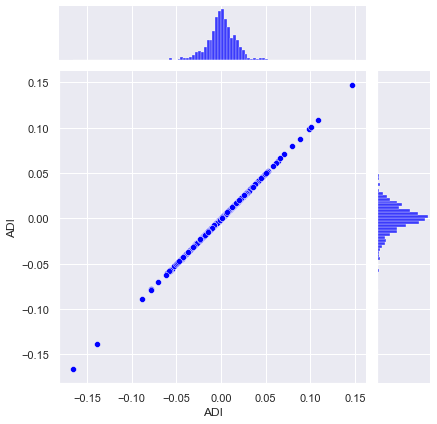

In [25]:
sns.jointplot('ADI', 'ADI', corr_dfnew, kind='scatter', color='blue')

This is what we would expect, now let us compare between Monster Beverage Corp and Keurig Dr Pepper, 2 beverage companies:

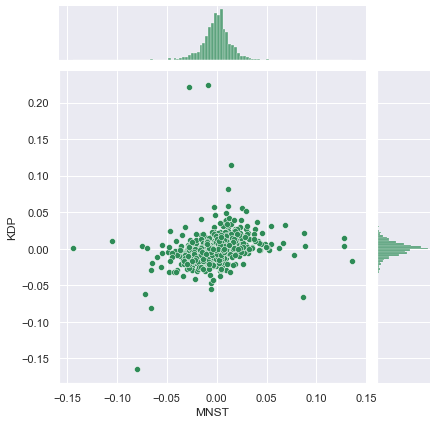

In [26]:
sns.jointplot('MNST', 'KDP', corr_dfnew, kind='scatter', color='seagreen')

Interesting to view how the relationship between these two stocks is more scattered than linear here. Let us now view our whole dataframe to see if there are any correlations that stand out:

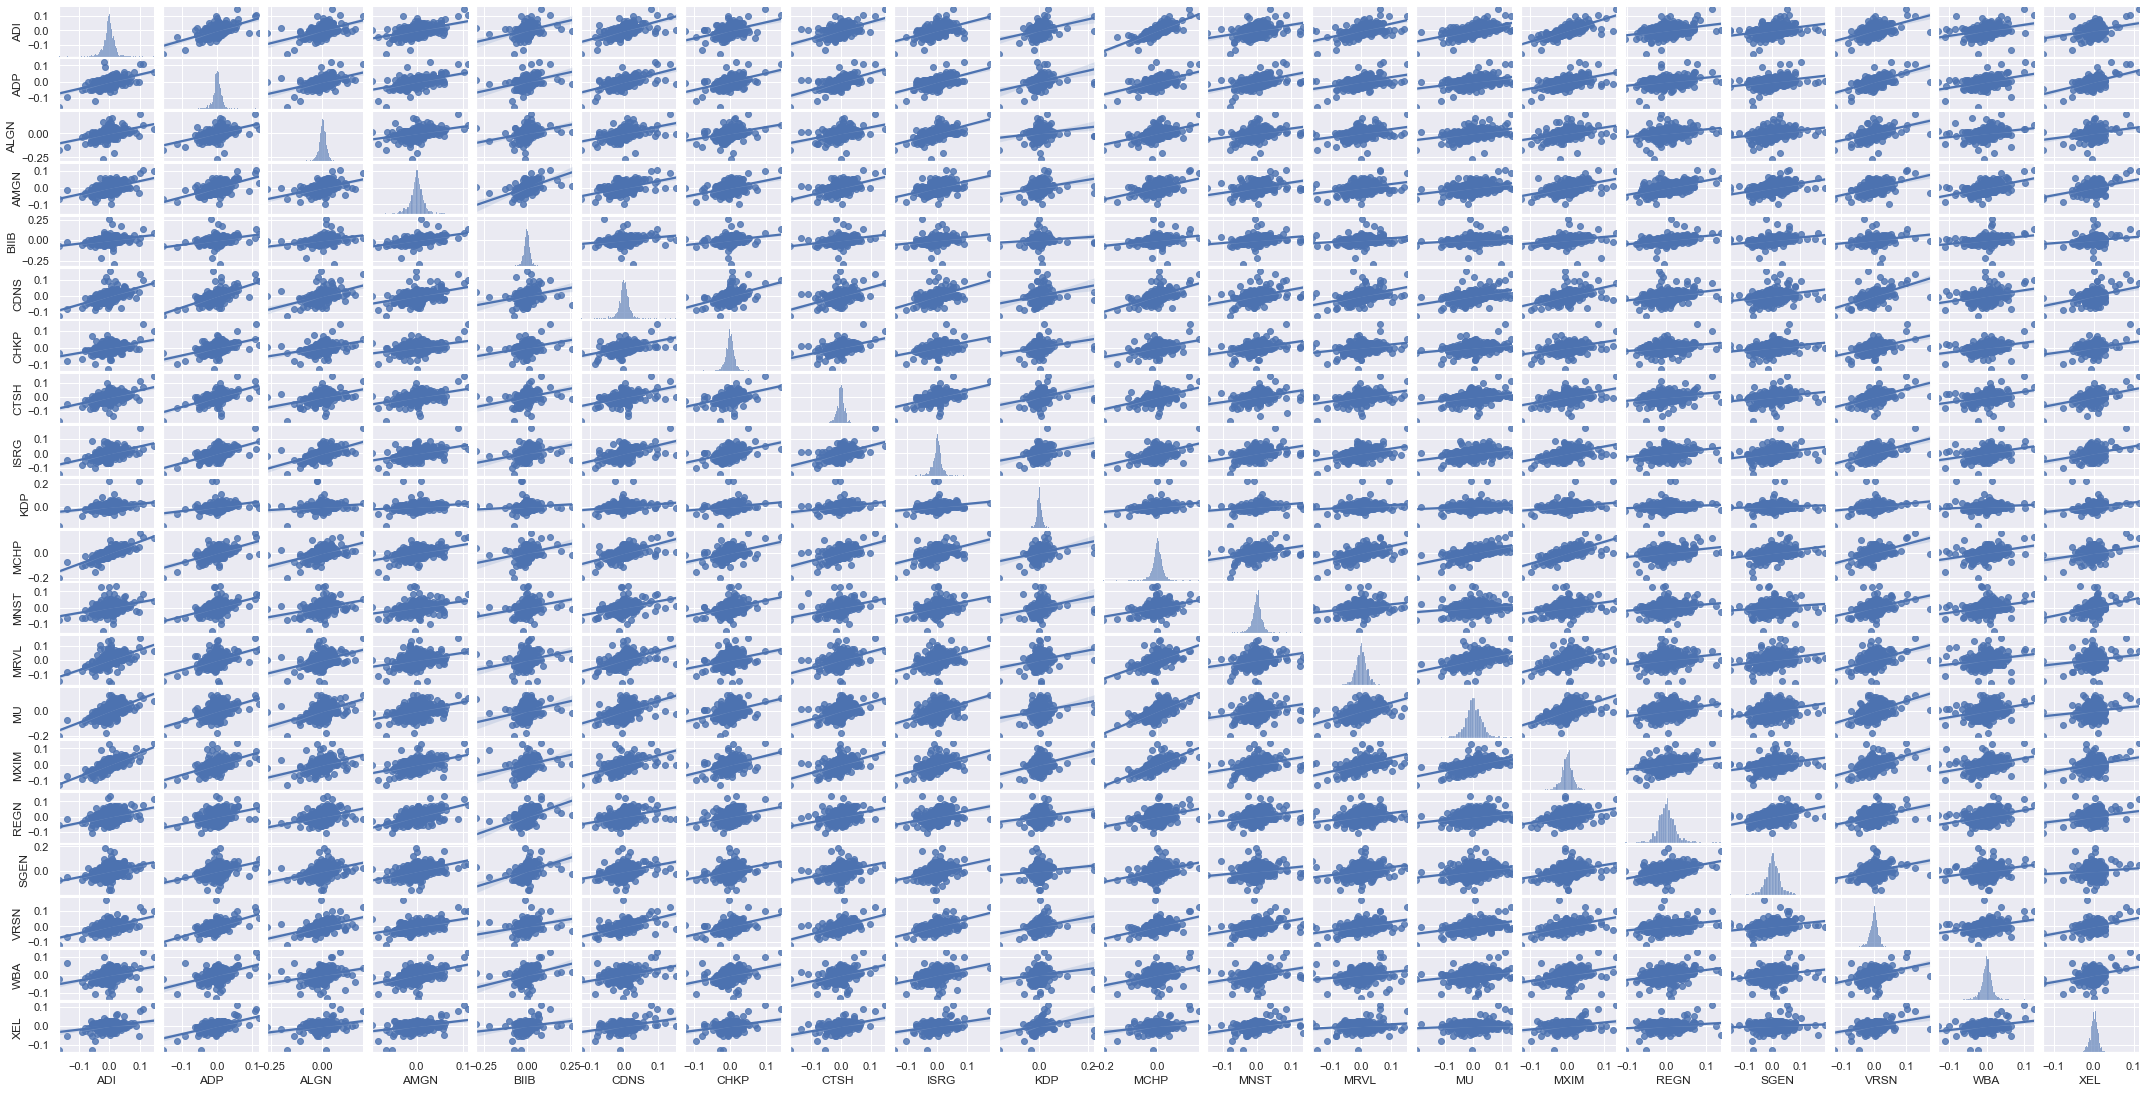

In [27]:
#may take some time to output
#also may be difficult to view without zooming in
pp = sns.pairplot(corr_dfnew, kind='reg')
pp.fig.set_size_inches(30,15)

From looking at all of the pairplots, one pair of stocks looked relatively linear so let us look further into these. The stocks are 
1) MCHP
<br>
2) ADI
</br>

Let us look at these more visibly and then compare their 5 year adj price charts:

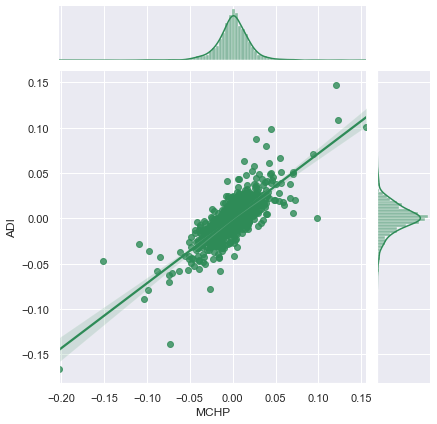

In [28]:
sns.jointplot('MCHP', 'ADI', corr_dfnew, kind='reg', color='seagreen')

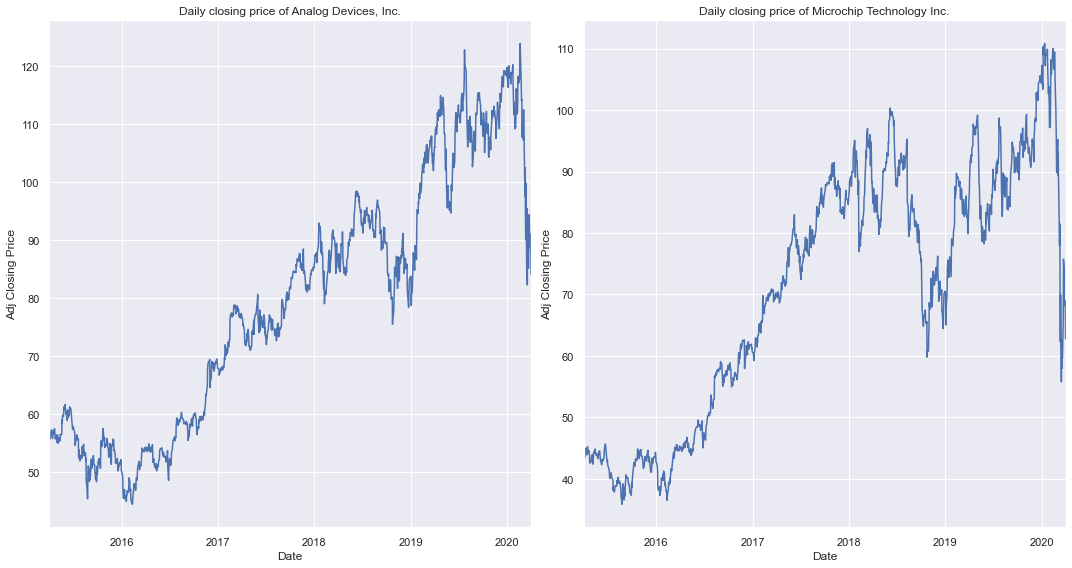

In [29]:
jplot = [ADI, MCHP]
jplot_str = ['Analog Devices, Inc.', 'Microchip Technology Inc.']
fig, ax = plt.subplots(figsize=(15, 8))
for i, company in enumerate(jplot, 1):
    plt.subplot(1, 2, i)
    x = pd.to_datetime(company['Date'])
    y = company['Adj Close']
    plt.plot(x, y)
    plt.xlim([datetime.date(2015, 4, 1), datetime.date(2020, 4, 1)])

    plt.ylabel('Adj Closing Price')
    plt.xlabel('Date')
    plt.title(f"Daily closing price of {jplot_str[i-1]}")
    

    plt.tight_layout()

Wow! we can see how closely the price pattern of these stocks follow each other very similarly considering the adjusted price. Very cool stuff!

Let's now look at setting up a pairgrid to look at some other visualizations only this time, we will use our top 6 dataset:

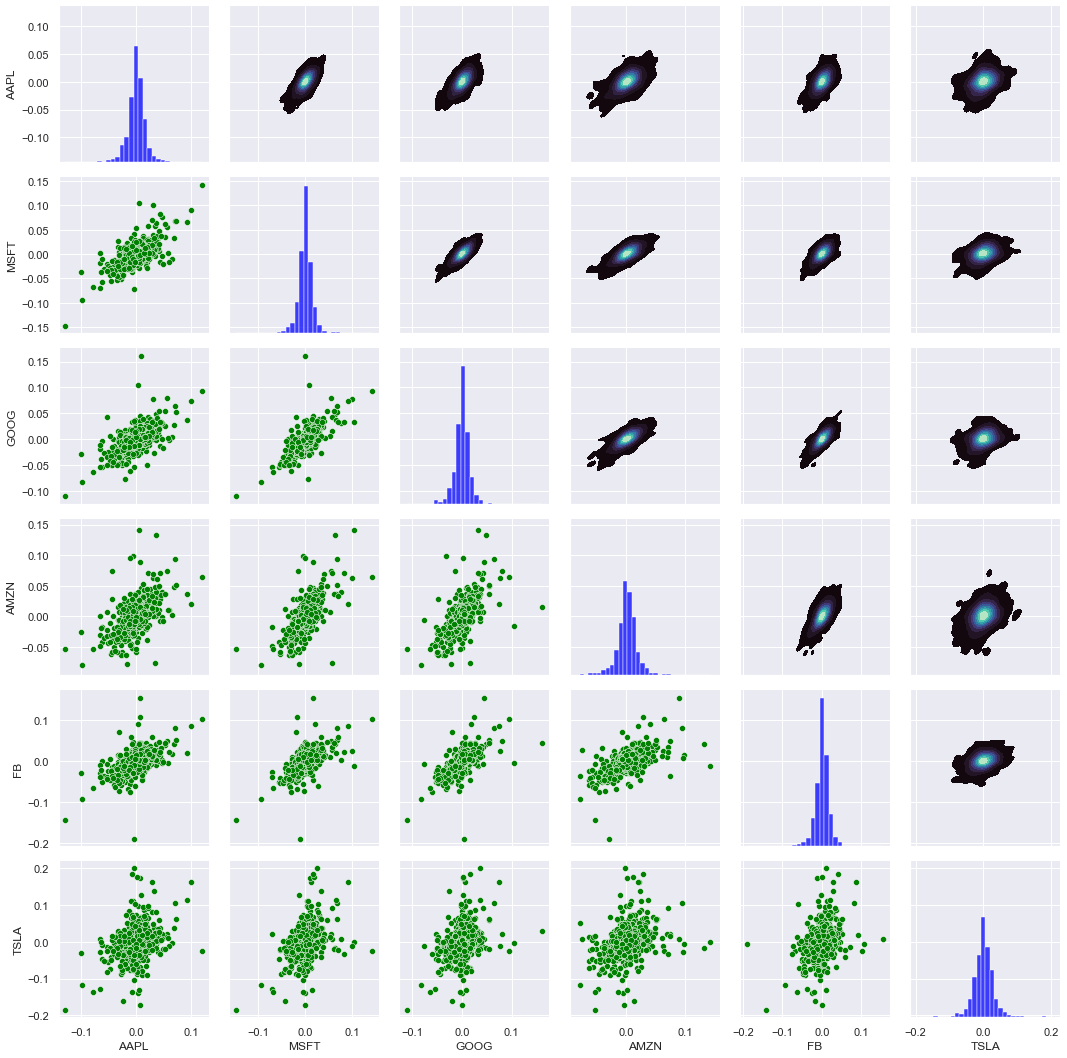

In [30]:
top6_df = web.get_data_yahoo(Company_Name,start=start,end=end)['Adj Close']

new_fig = sns.PairGrid(top6_df.pct_change())

new_fig.map_upper(sns.kdeplot, cmap = 'mako', fill=True)
new_fig.map_diag(sns.histplot, bins = 30, color = 'blue')
new_fig.map_lower(sns.scatterplot, color = 'green')

We could also look at a heatmap of the stocks and their correlation to each other:

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

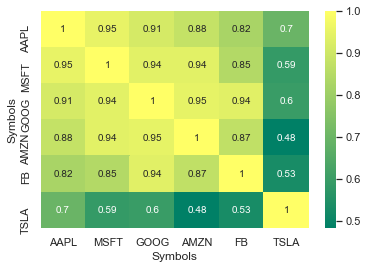

In [31]:
sns.heatmap(top6_df.corr(), annot=True, cmap='summer')

It is interested to note how many of these stocks are highly correlated to each other. We could also do the same with our other subset:

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

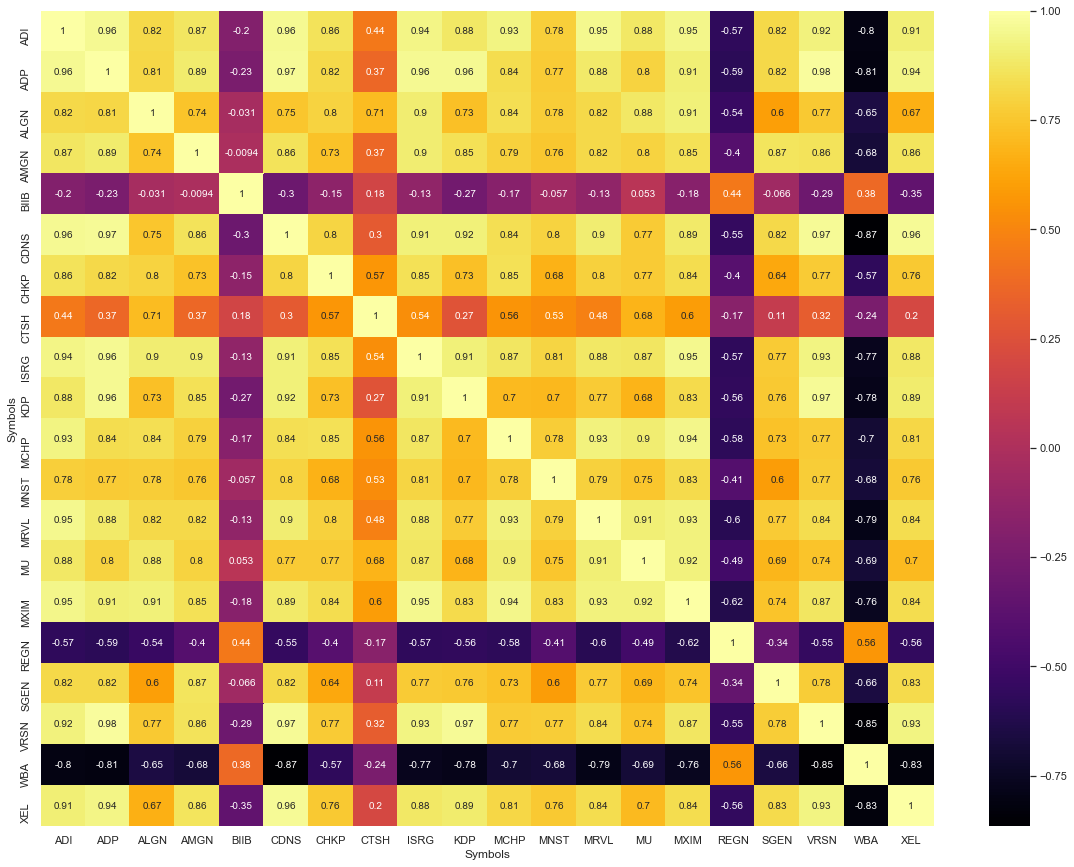

In [32]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr_df.corr(), annot=True, cmap='inferno')


If we wanted to easily view the highly correlated stocks (ex. greater than or equal to 95%) we could do the following: 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

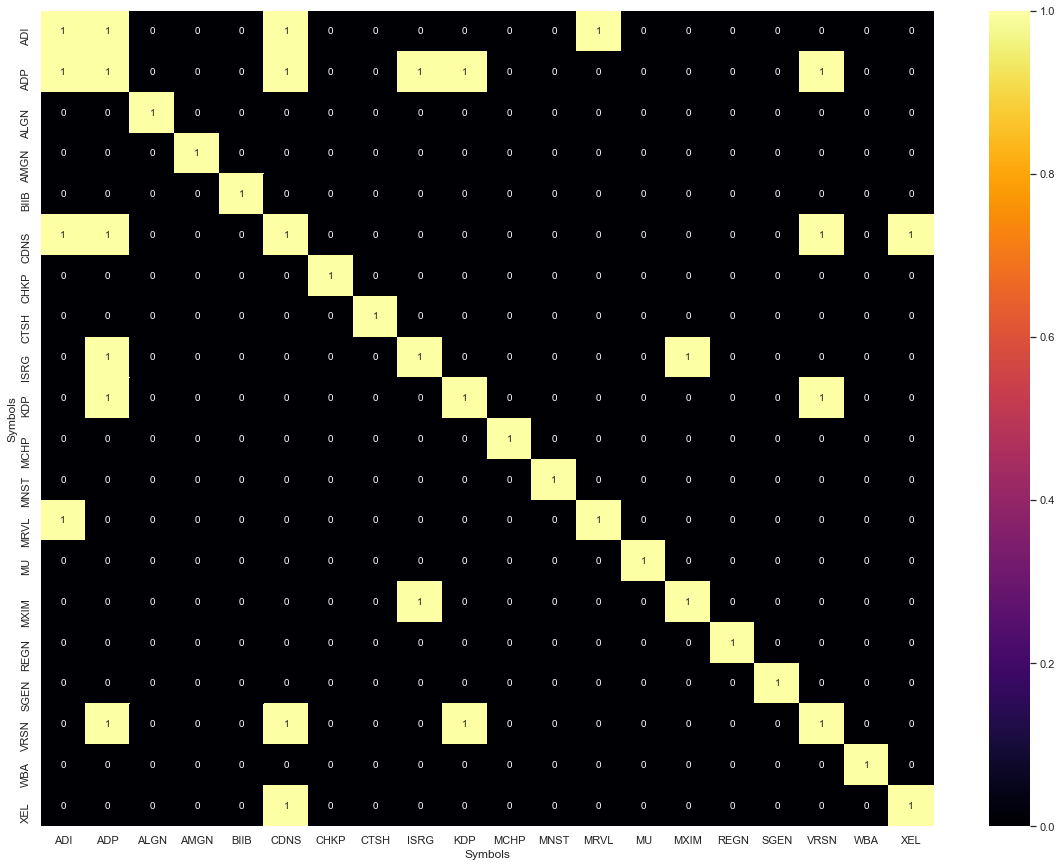

In [33]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr_df.corr() >= 0.95, annot=True, cmap='inferno')


In this case, we would ignore the main diagonal and look at everything else.

## Data Cleansing/PreProcessing

Now we will look to start preparing some data to build a predictive price model. We will start by selecting a random stock from our dataset of 85 stocks and create a seperate dataframe for it and add some additional columns that we created previous and other important values:

In [34]:
#random stock
#stocks.sample()

#Vertex Pharma

okay, so let us create a dataframe for Vertex Pharmaceuticals Inc as that was the random stock we had output in the previous line and begin our process. It is also recommended to use at least 9 years worth of data (12 on the safe side) to train an effective LSTM model, so we will simply import the rest and create our dataframe below:

In [35]:
VRTX = pd.DataFrame(web.get_data_yahoo('VRTX',start='2011-04-01',end=end))

print(VRTX.shape)
VRTX.head()

(2265, 6)


High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2011-04-01  48.200001  47.209999  48.000000  47.590000  2610200  47.590000
2011-04-04  48.110001  47.220001  47.910000  47.490002  2556800  47.490002
2011-04-05  47.599998  46.520000  47.320000  46.740002  2760700  46.740002
2011-04-06  47.369999  46.160000  47.279999  46.419998  2321100  46.419998
2011-04-07  47.250000  46.150002  46.500000  46.910000  1523900  46.910000

Now lets drop some columns we don't need as we will only be using the closing price each day for the stock:

In [36]:
VRTX.drop(columns =['High', 'Low', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)

In [37]:
# Should have (2265,1) vector
print(VRTX.shape)
VRTX


(2265, 1)


Close
Date                  
2011-04-01   47.590000
2011-04-04   47.490002
2011-04-05   46.740002
2011-04-06   46.419998
2011-04-07   46.910000
...                ...
2020-03-26  224.490005
2020-03-27  217.240005
2020-03-30  231.919998
2020-03-31  237.949997
2020-04-01  225.479996

[2265 rows x 1 columns]

Now with what we have now, we can begin building our predictive model. We will use a LSTM (Long Short-Term Memory) model to do so.

## Model Preparation & Train-Test Split 

lets take a look at our data so we get an idea of what 5 years of data provides us:

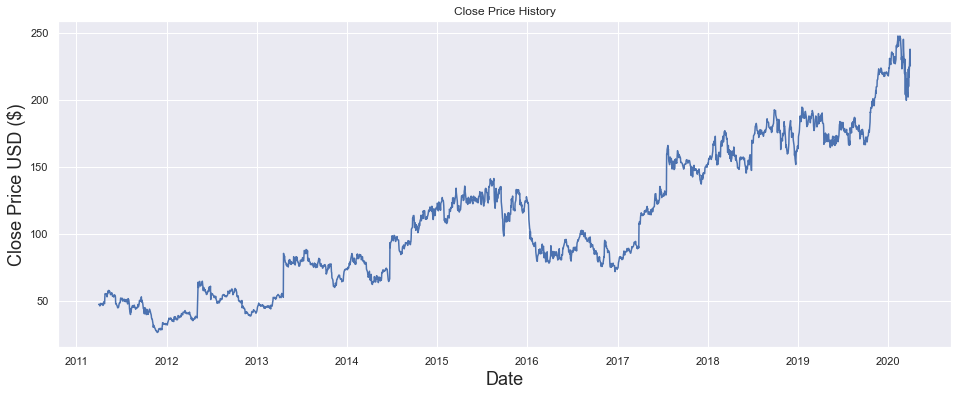

In [38]:
#Closing Price

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(VRTX['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Let us now scale our data using the help of sklearn:

In [39]:
# save for later
VRTX1 = VRTX.filter(['Close'])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
VRTX = scaler.fit_transform(np.array(VRTX).reshape(-1, 1))

In [40]:
VRTX

array([[0.09488721],
       [0.09443516],
       [0.09104472],
       ...,
       [0.92816781],
       [0.95542697],
       [0.89905519]])

Next, we will perform our train-test split. We will do a 70/30 split in this case. As our dataset is relatively small, this is why are using this method.

In [41]:
train = int(len(VRTX)*0.70)
test = len(VRTX) - train
training_data, test_data = VRTX[0:train,:],VRTX[train:len(VRTX),:]
print(len(training_data), len(test_data))

1585 680


## Some additional preprocessing

We will not setup a timestep value on our dataset. We will use one hundred records. So in this case, if we are trying to predict a stock, we will track the previous 100 records, and the 101th element will be what we are looking to predict. Similarly, we will do this for our input X, and output Y:

In [42]:
def dataset(df, look_back=1):
    X = []
    Y = []
    for i in range(look_back, len(df)):
        X.append(df[i-100:i, 0])
        Y.append(df[i, 0])
    return np.array(X), np.array(Y)

In [43]:
# use appropriate look back variable set to 100
look_back = 100
trainX, trainY = dataset(training_data, look_back)

In [44]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
print(trainX.shape)

(1485, 100, 1)


## Build Stacked LSTM Model

Now it is time to build our LSTM Model. We will a few LSTM layers and a few dropout layers to help prevent overfitting.

We will use the following:
1. 128, 64 units for our dimensionality of our output
2. *input_shape* our input dimension (training set) 
3. *return_sequences* = **True** which will determine whether to return the last output in the output sequence, or in the entire sequence


We will then finish with each LSTM getting a dropout layer of 0.20. This means, we will drop 20% of the layers. This will help to prevent overfitting the model.

Finally, we finish with 2 dense layers and compile the model. Let us use mean-squared error for our loss function and the adam optimizer for our optimizer and finally output the time it took to compile our model:

In [129]:
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units = 128, input_shape = (trainX.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
                  
model.add(Dense(units=32))
model.add(Dense(units=1))

start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print ('compilation time : ', time.time() - start)

compilation time :  0.0020012855529785156


In [130]:
model.fit(
    trainX,
    trainY,
    batch_size=16,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
89/89 [==============================] - 19s 167ms/step - loss: 0.0106 - val_loss: 9.0816e-04
Epoch 2/10
89/89 [==============================] - 14s 156ms/step - loss: 0.0010 - val_loss: 6.8490e-04
Epoch 3/10
89/89 [==============================] - 14s 155ms/step - loss: 8.4667e-04 - val_loss: 0.0011
Epoch 4/10
89/89 [==============================] - 14s 154ms/step - loss: 8.8450e-04 - val_loss: 8.6748e-04
Epoch 5/10
89/89 [==============================] - 14s 154ms/step - loss: 6.2690e-04 - val_loss: 6.6467e-04
Epoch 6/10
89/89 [==============================] - 14s 154ms/step - loss: 6.4762e-04 - val_loss: 7.3604e-04
Epoch 7/10
89/89 [==============================] - 14s 155ms/step - loss: 5.7408e-04 - val_loss: 6.2156e-04
Epoch 8/10
89/89 [==============================] - 14s 155ms/step - loss: 5.3456e-04 - val_loss: 4.5317e-04
Epoch 9/10
89/89 [==============================] - 14s 154ms/step - loss: 4.4874e-04 - val_loss: 9.5655e-04
Epoch 10/10
89/89 [============

In [131]:
test_data = VRTX[train - 100: , :]
x_test = []
y_test = VRTX[train:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [132]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(x_test.shape)

(680, 100, 1)


## Model Performance Metrics

Now we will look at the root mean squared error of our model and we will finish off this notebook by plotting our models predictions:

In [133]:
# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

172.71084297083982

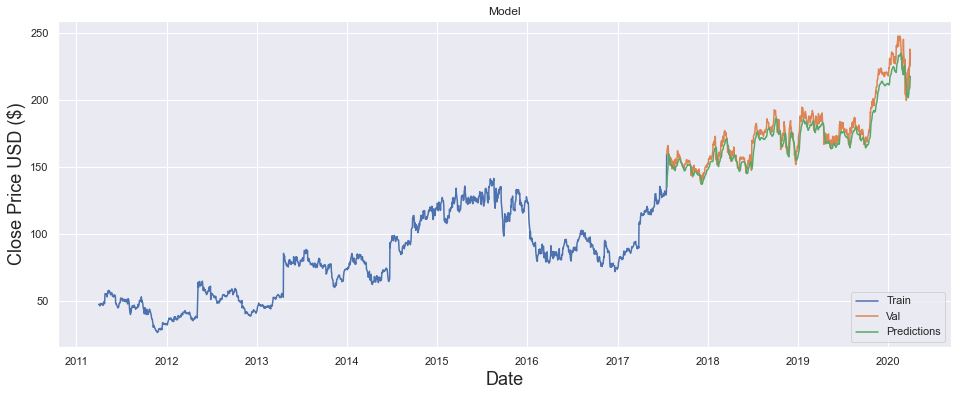

In [134]:
training = VRTX1[:train]
valid = VRTX1[train:]
valid['Predictions'] = predictions
valid['Variance'] = (valid['Predictions']-valid['Close']) 
valid['% Error'] = (valid['Variance']/valid['Close'])
valid['Absolute Variance'] = abs(valid['Variance'])
valid['Accuracy'] = (valid['Close'] - valid['Absolute Variance'])/valid['Close']
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(training['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Our model did fairly well when it came to predicting the price, now let us look at our predictions from start to finish and see if there were changes in how the model performed towards the end of our timeline:

In [135]:
valid

Close  Predictions   Variance   % Error  Absolute Variance  \
Date                                                                          
2017-07-20  159.330002   135.043289 -24.286713 -0.152430          24.286713   
2017-07-21  163.169998   141.720978 -21.449020 -0.131452          21.449020   
2017-07-24  166.110001   148.384964 -17.725037 -0.106707          17.725037   
2017-07-25  161.970001   154.232956  -7.737045 -0.047768           7.737045   
2017-07-26  163.419998   157.728424  -5.691574 -0.034828           5.691574   
...                ...          ...        ...       ...                ...   
2020-03-26  224.490005   204.712006 -19.778000 -0.088102          19.778000   
2020-03-27  217.240005   207.545135  -9.694870 -0.044627           9.694870   
2020-03-30  231.919998   209.269745 -22.650253 -0.097664          22.650253   
2020-03-31  237.949997   212.901276 -25.048721 -0.105269          25.048721   
2020-04-01  225.479996   217.694931  -7.785065 -0.034527           7.785065   

            Accuracy  
Date                  
2017-07-20  0.847570  
2017-07-21  0.868548  
2017-07-24  0.893293  
2017-07-25  0.952232  
2017-07-26  0.965172  
...              ...  
2020-03-26  0.911898  
2020-03-27  0.955373  
2020-03-30  0.902336  
2020-03-31  0.894731  
2020-04-01  0.965473  

[680 rows x 6 columns]

In [136]:
#Overall % Accuracy
valid['Accuracy'].mean()

0.9691655395662986

## End of Notebook

We've reached the end of the notebook! Thank you so much for viewing and making it this far. Hoping you enjoy the rest of your day and feel free to check out the other notebooks and projects I have saved in my repository!